# Visualizing the Gender Gap in College Graduates Across Majors


In this notebook we'll explore a data set released from the [Department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp) containing the percent of bachelor's degrees awarded to women across 18 majors from 1970 to 2011. Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available to download [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

Our objective is to tell a story of gender inequality in higher education through compelling data visualizations, and hopefully, encourage further discussion on the topic. (This notebook is an adaptation of the "Visualizing the Gender Gap in College Degrees" project on Dataquest.)

Specifically, we seek to answer the following questions:

* How has the gender inequality in Bachelor's degrees changed over time? 
* Is the inequality increasing or decreasing?
* Which degrees are more homogeneous in gender? 
* Which are more inhomogeneous?
* Is there a significant difference in homogeneity between STEM and non-STEM degrees?

# Exploratory Data Visualization

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline

In [2]:
# read csv file into a dataframe
women_grads_ts = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [3]:
# print first 5 rows
women_grads_ts.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [4]:
# print last 5 rows
women_grads_ts.tail()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
37,2007,47.605026,43.100459,61.4,59.411993,49.000459,62.5,17.6,78.721413,16.8,67.874923,70.2,85.4,44.1,40.7,77.1,82.1,49.3
38,2008,47.570834,42.711730,60.7,59.305765,48.888027,62.4,17.8,79.196327,16.5,67.594028,70.2,85.2,43.3,40.7,77.2,81.7,49.4
39,2009,48.667224,43.348921,61.0,58.489583,48.840474,62.8,18.1,79.532909,16.8,67.969792,69.3,85.1,43.3,40.7,77.1,82.0,49.4
40,2010,48.730042,42.066721,61.3,59.010255,48.757988,62.5,17.6,79.618625,17.2,67.928106,69.0,85.0,43.1,40.2,77.0,81.7,49.3
41,2011,50.037182,42.773438,61.2,58.742397,48.180418,62.2,18.2,79.432812,17.5,68.426730,69.5,84.8,43.1,40.1,76.7,81.9,49.2


**Some observations:**

* The data set contains STEM (science, technology, engineering, and mathematics) majors as well as non-STEM majors.

* Some columns have percentages with a precision of 6 decimal places while others have a precision of 1 decimal place.

Let's standardize the data and round all the percentages to 2 decimal places.

In [5]:
# round the percentages to 2 decimal places
women_grads_ts = women_grads_ts.round(2)
women_grads_ts.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.23,11.92,59.7,29.09,9.06,35.3,13.6,74.54,0.8,65.57,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.45,12.00,59.9,29.39,9.50,35.5,13.6,74.15,1.0,64.56,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.42,13.21,60.4,29.81,10.56,36.6,14.9,73.55,1.2,63.66,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.65,14.79,60.2,31.15,12.80,38.4,16.4,73.50,1.6,62.94,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.07,17.44,61.9,33.00,16.20,40.5,18.9,73.34,2.2,62.41,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [6]:
women_grads_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

In [7]:
# prints summary statistics for each major
columns = list(women_grads_ts.columns)
columns.remove("Year")
women_grads_ts[columns].describe()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,33.848333,33.684762,61.100000,49.429762,40.652857,56.216667,25.809524,76.356429,12.892857,66.186667,71.723810,82.983333,44.478571,31.304762,68.776190,76.085714,45.407143
std,12.553803,9.575056,1.305336,10.087595,13.116635,8.698610,6.688753,2.212510,5.670824,1.951096,1.926682,2.914967,2.646262,9.000866,9.705463,5.879504,4.763653
min,4.230000,11.920000,58.600000,29.090000,9.060000,35.300000,13.600000,72.170000,0.800000,61.650000,69.000000,75.500000,38.000000,13.800000,44.400000,62.600000,36.100000
25%,30.842500,28.520000,60.200000,44.312500,37.395000,55.125000,19.125000,74.995000,10.625000,65.582500,70.125000,81.825000,42.875000,24.875000,65.550000,74.625000,43.825000
50%,33.315000,35.995000,61.300000,50.970000,47.210000,59.850000,27.300000,75.935000,14.100000,66.110000,71.150000,83.700000,44.900000,32.100000,72.750000,77.450000,45.300000
75%,45.667500,40.787500,62.000000,58.677500,48.877500,62.125000,29.775000,78.615000,16.950000,67.857500,73.875000,85.175000,46.500000,40.200000,76.925000,81.100000,49.375000
max,50.040000,44.500000,63.400000,62.170000,50.550000,64.600000,37.100000,79.620000,19.000000,68.890000,75.300000,86.500000,48.300000,42.200000,77.800000,82.100000,51.800000


## Preprocessing for a Relational Bar Plot

To answer the above questions in a single plot, we'll visualize the gender gap with two bar plots representing two points in time and compare the percentage of male and female graduates. To achieve this, we first need to build a new dataframe reshuffling the columns as the dates, the rows as the majors, and include the percentage of male graduates.

In [8]:
# initializes an empty list of dataframes 
df_list = []

# iterates over every year in the data set and builds a new dataframe with the 
# columns as the dates, the rows as the majors, and includes the percentage of male graduates.
for i in range(len(women_grads_ts)):
    
    # assigns year as a variable
    year = str(1970 + i)
    
    # percentage of male graduates
    cat_m = (100 - women_grads_ts.iloc[i,1:])
    # percentage of female graduates
    cat_f = 100 - cat_m
    
    # builds new dataframe with male and female major percentages for each year
    df = pd.DataFrame({'major_cat': cat_m.index, 'male':cat_m.values, 'female':cat_f.values})
    # reshuffles the columns as the dates and the rows as the majors
    df = pd.melt(df, id_vars="major_cat", var_name="sex", value_name=year)
    
    # crops major name for aesthetics
    #df['major_cat'] = df['major_cat'].str.replace('Communications and Journalism', 'Communications')
    
    # appends each dataframe
    df_list.append(df)
    
    # glues each dataframe together
    df_list[0][year] = df_list[i][year]
    df = df_list[0]

df.head()

,major_cat,sex,1970,1971,1972,1973,1974,1975,1976,1977,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Agriculture,male,95.77,94.55,92.58,90.35,85.93,81.67,77.75,75.36,...,52.87,52.06,52.11,52.33,53.21,52.39,52.43,51.33,51.27,49.96
1,Architecture,male,88.08,88.00,86.79,85.21,82.56,80.87,78.61,76.26,...,58.87,57.24,56.53,56.90,55.50,56.90,57.29,56.65,57.93,57.23
2,Art and Performance,male,40.30,40.10,39.60,39.80,38.10,39.10,38.70,38.00,...,39.10,38.90,38.70,38.60,38.40,38.60,39.30,39.00,38.70,38.80
3,Biology,male,70.91,70.61,70.19,68.85,67.00,65.55,63.93,61.67,...,38.10,37.83,38.09,38.50,39.83,40.59,40.69,41.51,40.99,41.26
4,Business,male,90.94,90.50,89.44,87.20,83.80,80.31,76.57,72.84,...,49.45,49.65,50.05,50.21,50.79,51.00,51.11,51.16,51.24,51.82


## Transforming the data with the Inequality Index

We now aim to quantify the amount of inequality in each major per year. The simplest way to do this is by calculating how far each major is from a 50-50% distribution in male-female percentages. Mathematically we have,
<br/><br/>

<center>$$\text{Inequality index} = \dfrac{| \ \text{% of female grads} - 50\%|}{50\%} = \dfrac{| \ \text{% of male grads} - 50\%|}{50\%}$$</center>

The Inequality index ranges between 0 and 1 with 0 indicating there is no inequality (i.e., a 50-50% distribution) and 1 indicating complete inequality (i.e., a 0-100% or 100-0% distribution).

In [9]:
# transforms above dataframe of percentages to the values of the inequality index
df_ineq = 2*abs(women_grads_ts.iloc[:,1:] - 50)/100
df_ineq.insert(loc=0, column = 'Year', value = women_grads_ts['Year'])
df_ineq.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,0.9154,0.7616,0.194,0.4182,0.8188,0.294,0.728,0.4908,0.984,0.3114,0.476,0.542,0.240,0.724,0.112,0.368,0.264
1,1971,0.8910,0.7600,0.198,0.4122,0.8100,0.290,0.728,0.4830,0.980,0.2912,0.478,0.510,0.220,0.702,0.076,0.310,0.276
2,1972,0.8516,0.7358,0.208,0.4038,0.7888,0.268,0.702,0.4710,0.976,0.2732,0.492,0.538,0.196,0.704,0.048,0.252,0.278
3,1973,0.8070,0.7042,0.204,0.3770,0.7440,0.232,0.672,0.4700,0.968,0.2588,0.498,0.548,0.182,0.670,0.008,0.286,0.272
4,1974,0.7186,0.6512,0.238,0.3400,0.6760,0.190,0.622,0.4668,0.956,0.2482,0.506,0.558,0.164,0.636,0.052,0.322,0.254


Next, we'll write a function that takes any two years in our data set as an argument and outputs two bar plots comparing the percentage of male and female graduates while displaying the average inequality index for those years.

In [10]:
# function takes two years as input and outputs 2 bar plots with average inequality index
def gender_gap(year_1, year_2):
    
    # calculates inequality indexs and their averages for males and females
    ineq_index_year_1 = 2*abs(df[df['sex']=='male'][year_1] - 50)/100
    ineq_index_year_2 = 2*abs(df[df['sex']=='female'][year_2] - 50)/100
    mean_ineq_index_1 = round(ineq_index_year_1.mean(), 2)
    mean_ineq_index_2 = round(ineq_index_year_2.mean(), 2)
    
    # builds the bar plots
    fig = plt.figure(figsize=(13,10))
    title = fig.suptitle('Gender Gap Across Time', fontsize=20, y = 0.955)
    fig.subplots_adjust(wspace=0.1)

    ax1 = fig.add_subplot(1,2,1)
    sns.set_style("white")
    g = sns.barplot(x=year_1, y='major_cat', 
                        hue='sex', data=df, ax=ax1)
    sns.despine(bottom=True, right=True, top=True)
    plt.tick_params(left=False, bottom=False)
    ax1.set_xlim(0,100)
    ax1.set_ylabel('')    
    ax1.set_xlabel('')
    ax1.set_title(year_1, fontsize = 15)
                                        
    fig.text(.26, .05, 'Avg Inequality Index: {}'.format(mean_ineq_index_1), ha='left', size=15)

    ax2 = fig.add_subplot(1,2,2)
    sns.set_style("white")
    g = sns.barplot(x=year_2, y='major_cat', 
                        hue='sex', data=df, ax=ax2)
    g.set(yticklabels=[])
    sns.despine(bottom=True, left=True, top=True)
    plt.tick_params(left=False, bottom=False)
    ax2.set_xlim(0,100)
    ax2.set_ylabel('')    
    ax2.set_xlabel('')
    ax2.set_title(year_2, fontsize = 15)
    ax2.get_legend().set_visible(False)
    
    fig.text(.78, .05, 'Avg Inequality Index: {}'.format(mean_ineq_index_2), ha='right', size=15)
                                         


# Visualizing the gender gap across time

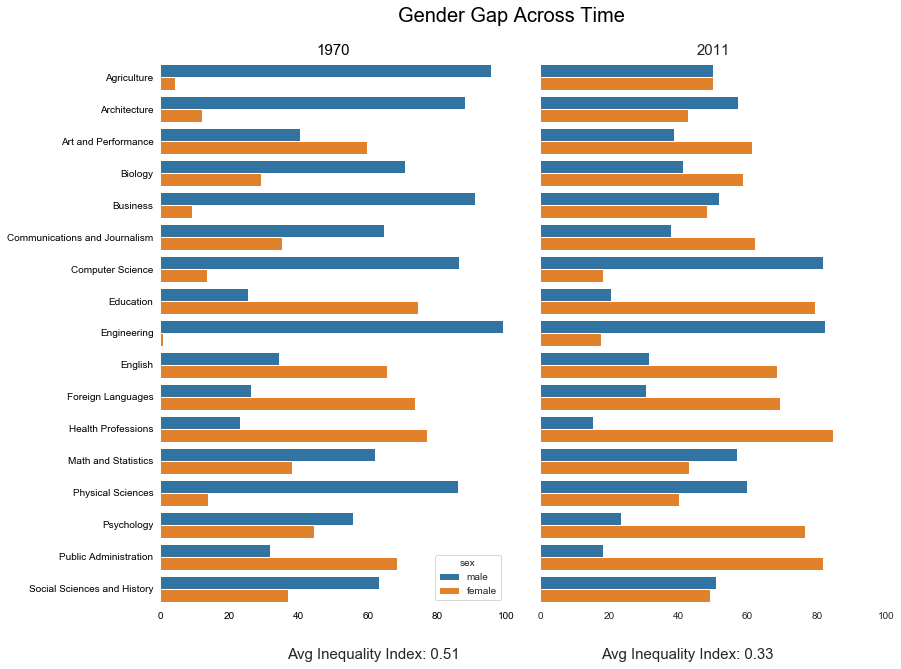

In [11]:
gender_gap('1970', '2011')

Looking at the above plot some interesting observations stick out. In 1970 Agriculture majors were overwhelmingly male (92%). Four decades later, the gender gap in Agriculture degrees vanishes with a perfect 50-50 split (Inequality index < 0.001) between men and women. For Biology graduates in 1970, only 29% were women. In 2011 the number of women graduating with Biology degrees outpaced that of men by nearly 20%. The only other fields where women graduates have outpaced men is Communications and Journalism and Psychology. Similiar to Agriculture, Business is the only other field to experience massive inequality in 1970 (91% male) and reach a near 50-50 split in 2011 (52% male, 48% female). The remaining fields (save Social Sciences and History) have either been predominatly male or female. English, Art and Performance, Education, Foreign Languages, and the Health Professions have been dominated by women since 1970 where Computer Science, Engineering, Maths and Statistics, and the Physical Sciences have been dominated by men since 1970. Overall, the inequality among the sexes have steadily decreased with an ~20% drop in the average Inequality index from 1970 to 2011.

To get a more fine-grained view of how inequality has changed over time, let's plot a heatmap next.


In [12]:
# transforms percentages to values of the inequality index for the above preprocessed dataframe
df2 = df.iloc[:,2:][df['sex']=='female'].applymap(lambda x: abs(x - 50)/50).round(2)
df2.insert(loc=0, column='major_cat', value=df.iloc[:,0])

In [13]:
# sorts the dataframe by the values in 2011
df2 = df2.set_index('major_cat').sort_values('2011')
df2.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
major_cat,,,,,,,,,,,,,,,,,,,,,
Agriculture,0.92,0.89,0.85,0.81,0.72,0.63,0.56,0.51,0.46,0.41,...,0.06,0.04,0.04,0.05,0.06,0.05,0.05,0.03,0.03,0.00
Social Sciences and History,0.26,0.28,0.28,0.27,0.25,0.25,0.22,0.19,0.16,0.13,...,0.03,0.02,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.02
Business,0.82,0.81,0.79,0.74,0.68,0.61,0.53,0.46,0.39,0.33,...,0.01,0.01,0.00,0.00,0.02,0.02,0.02,0.02,0.02,0.04
Math and Statistics,0.24,0.22,0.20,0.18,0.16,0.19,0.17,0.18,0.17,0.15,...,0.09,0.08,0.11,0.10,0.12,0.12,0.13,0.13,0.14,0.14
Architecture,0.76,0.76,0.74,0.70,0.65,0.62,0.57,0.53,0.48,0.44,...,0.18,0.14,0.13,0.14,0.11,0.14,0.15,0.13,0.16,0.14


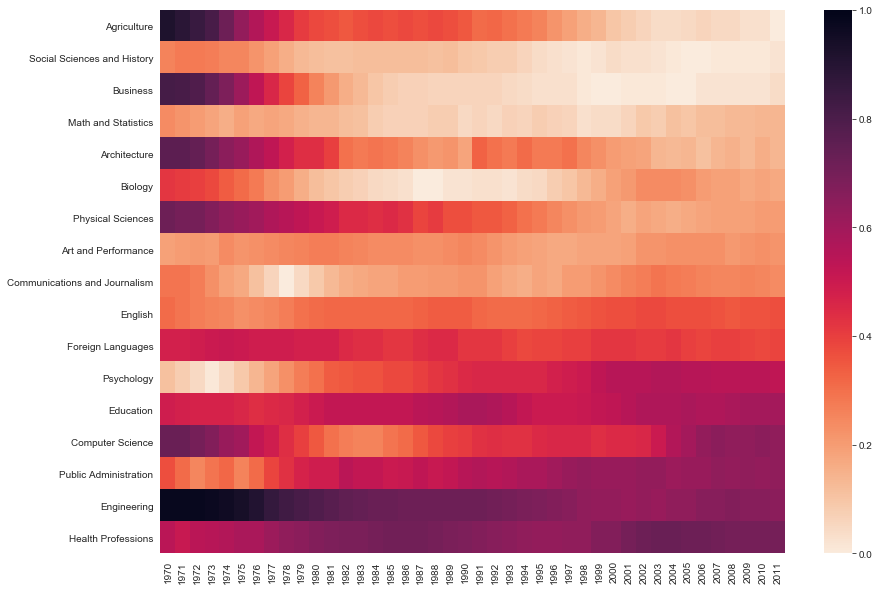

In [14]:
# builds a heatmap
fig = plt.figure(figsize=(14,10))
sns.heatmap(df2, vmin=0, vmax=1, cmap=sns.cm.rocket_r)
plt.ylabel('')
plt.tick_params(left=False, bottom=False)

Darker colors represent values of the inequality index closer to 1 (i.e., total inequality) while lighter colors represent values closer to 0 (i.e., total equality). Additionally, the majors are sorted by the inequality in 2011 from most to least equal.

With a more fine-grained perspective, we see Business and Agriculture are the fastest moving fields towards equality whereas Engineering and Computer Science are the slowest. Other fields, such as Art and Performance, English, and Commnuications and Journalism have remained somewhat constant in their inequality.

Finally, let's visualize a line plot of the average inequality index.

In [15]:
# Series containing the average inequality index
s_ineq_avg = df_ineq.iloc[:,1:].mean(axis=1)
year = df_ineq['Year']

# dataframe containing the average inequality index
df3 = pd.DataFrame({'Year': year.values, 'Inequality_Average':s_ineq_avg.values})
df3.head()

,Year,Inequality_Average
0,1970,0.508365
1,1971,0.495024
2,1972,0.481541
3,1973,0.464765
4,1974,0.446988


Text(1998, 0.3576235294117646, 'global min (1998)')

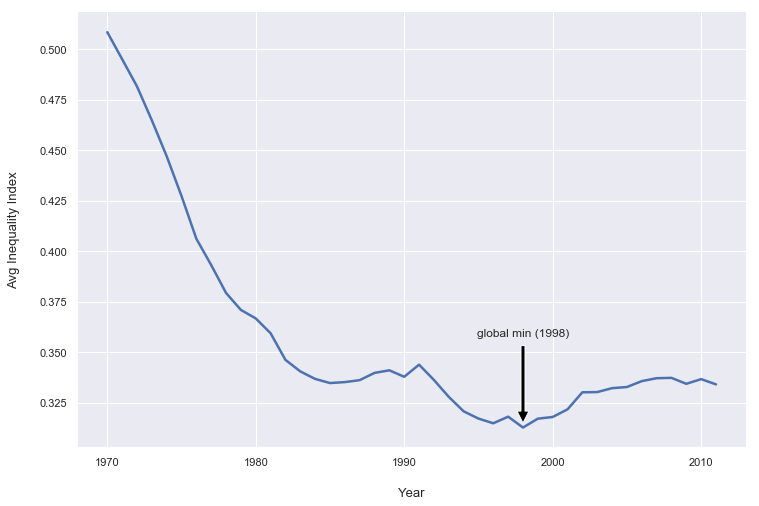

In [16]:
# builds a line plot of the average inequality index
fig = plt.figure(figsize=(12,8))
sns.set()
sns.lineplot(x = 'Year', y= 'Inequality_Average', data = df3, palette="rocket_r", linewidth=2.5)
sns.despine()
plt.ylabel('Avg Inequality Index', labelpad=20, size=13)
plt.xlabel('Year', labelpad=20, size=13)
plt.tick_params(left=False, bottom=False)

# finds and annotates global minimum
ymin = min(df3['Inequality_Average'])
xpos = df3['Inequality_Average'].tolist().index(ymin)
xmin = df3['Year'][xpos]

plt.annotate('global min (1998)', xy=(xmin, ymin), xytext=(xmin, ymin +.045), ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

Between 1970 and 1980 the inequality sharply droped before plateuing in 1990. Shortly thereafter, the inequality dropped to its global minimum in 1998 and then steadily increased. Let's get a better idea of what's happening between 1991 (local maximum), 1998 (global minimum), and 2011.

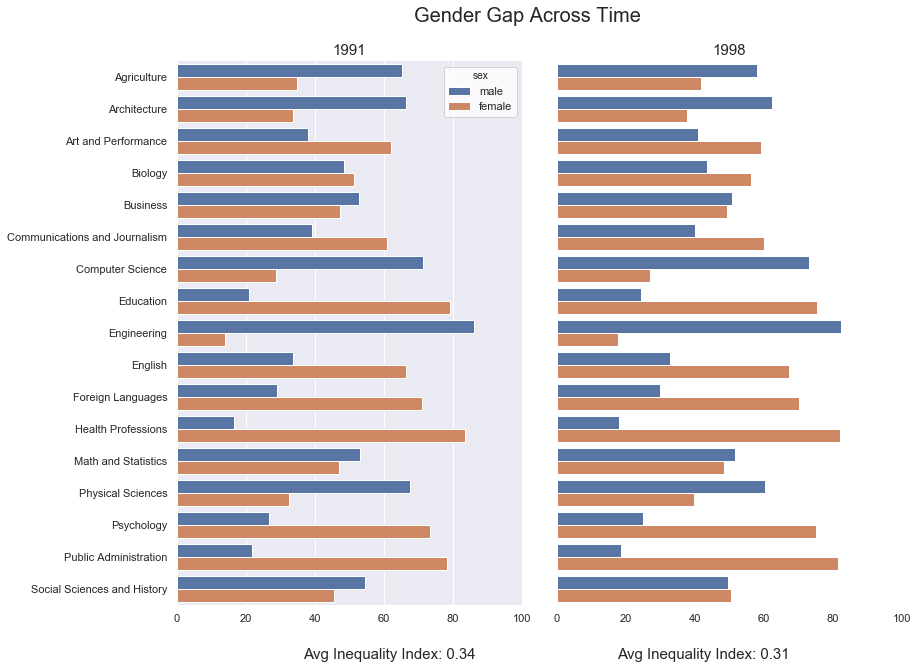

In [17]:
gender_gap('1991', '1998')

Between 91' and 98' virtually every field is either decreasing in inequality or staying relatively the same. The Inequality index decreased by 3%.

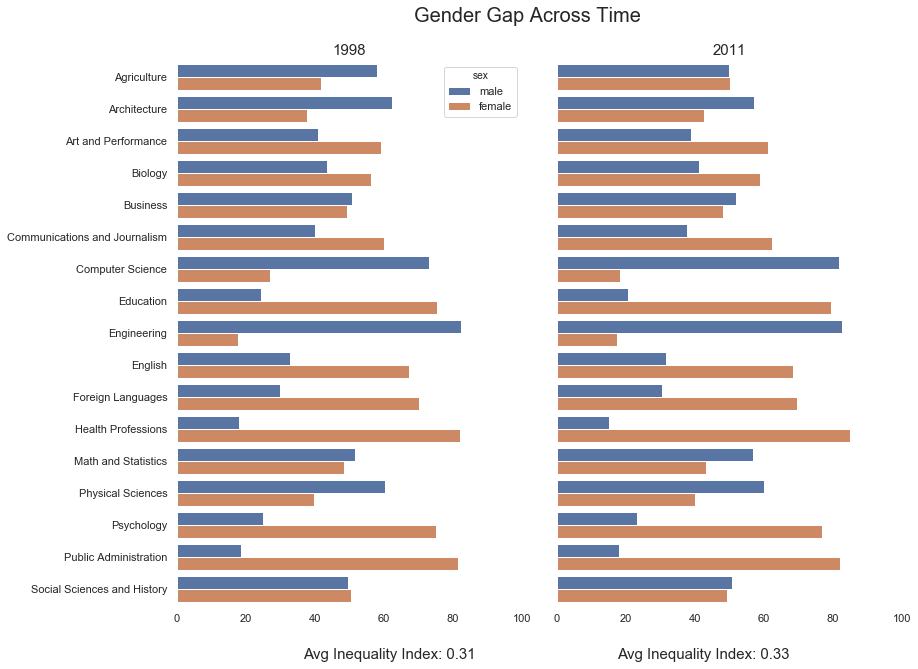

In [18]:
gender_gap('1998', '2011')

Between 1998 and 2011 9 out of 18 fields became slightly more inequal. The average inequality index increased by 2%.

Lastly, lets group the data by STEM and non-STEM fields and the plot the results.

In [19]:
df2 = df2.reset_index()

In [20]:
s_bool = (df2['major_cat'] == 'Computer Science') | (df2['major_cat'] == 'Engineering') | (
    (df2['major_cat'] == 'Biology') | (df2['major_cat'] == 'Physical Sciences') | (
        (df2['major_cat'] == 'Math and Statistics')
)
)

def stem(bool):
    if bool == True:
        return 'yes'
    return 'no'

s_stem = s_bool.apply(stem) 

df2.insert(loc=1, column='STEM', value=s_stem)
df2.head()

,major_cat,STEM,1970,1971,1972,1973,1974,1975,1976,1977,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Agriculture,no,0.92,0.89,0.85,0.81,0.72,0.63,0.56,0.51,...,0.06,0.04,0.04,0.05,0.06,0.05,0.05,0.03,0.03,0.00
1,Social Sciences and History,no,0.26,0.28,0.28,0.27,0.25,0.25,0.22,0.19,...,0.03,0.02,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.02
2,Business,no,0.82,0.81,0.79,0.74,0.68,0.61,0.53,0.46,...,0.01,0.01,0.00,0.00,0.02,0.02,0.02,0.02,0.02,0.04
3,Math and Statistics,yes,0.24,0.22,0.20,0.18,0.16,0.19,0.17,0.18,...,0.09,0.08,0.11,0.10,0.12,0.12,0.13,0.13,0.14,0.14
4,Architecture,no,0.76,0.76,0.74,0.70,0.65,0.62,0.57,0.53,...,0.18,0.14,0.13,0.14,0.11,0.14,0.15,0.13,0.16,0.14


In [21]:
df3['Non_STEM_Ineq_Avg'] = df2.groupby(['STEM']).mean().iloc[0,:].reset_index(drop=True)
df3['STEM_Ineq_Avg'] = df2.groupby(['STEM']).mean().iloc[1,:].reset_index(drop=True)
df3.head()

,Year,Inequality_Average,Non_STEM_Ineq_Avg,STEM_Ineq_Avg
0,1970,0.508365,0.461667,0.618
1,1971,0.495024,0.448333,0.608
2,1972,0.481541,0.434167,0.596
3,1973,0.464765,0.419167,0.574
4,1974,0.446988,0.407500,0.544


Text(1998, 0.3576235294117646, 'global min (1998)')

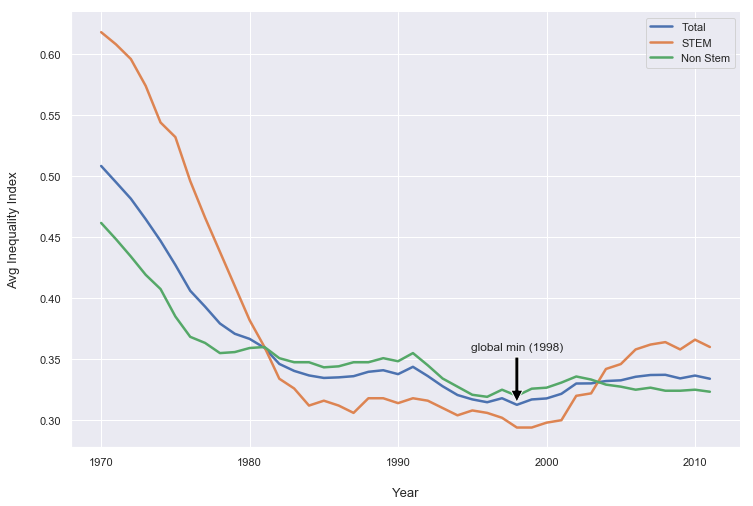

In [22]:
fig = plt.figure(figsize=(12,8))
sns.set()
sns.lineplot(x = 'Year', y= 'Inequality_Average', data = df3, palette="rocket_r", linewidth=2.5, label='Total')
sns.lineplot(x = 'Year', y= 'STEM_Ineq_Avg', data = df3, palette="rocket_r", linewidth=2.5, label='STEM')
sns.lineplot(x = 'Year', y= 'Non_STEM_Ineq_Avg', data = df3, palette="rocket_r", linewidth=2.5, label='Non Stem')
sns.despine()
plt.ylabel('Avg Inequality Index', labelpad=20, size=13)
plt.xlabel('Year', labelpad=20, size=13)
plt.tick_params(left=False, bottom=False)
plt.legend()

ymin = min(df3['Inequality_Average'])
xpos = df3['Inequality_Average'].tolist().index(ymin)
xmin = df3['Year'][xpos]

plt.annotate('global min (1998)', xy=(xmin, ymin), xytext=(xmin, ymin +.045), ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05),
            )